In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import yfinance as yf

In [2]:
import yfinance as yf
import datetime as dt

tickers = ['AAPL', 'TSLA', 'AMD']

start = dt.datetime.today() - dt.timedelta(5 * 365)
end = dt.datetime.today()

for ticker in tickers:
    data = yf.download(ticker, start, end)
    data.to_csv(f'{ticker}.csv', index=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
AAPL = pd.read_csv('AAPL.csv')
TSLA = pd.read_csv('TSLA.csv')
AMD = pd.read_csv('AMD.csv')

## Moving Average

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set. Here is a simple figure that will help you understand this with more clarity.

### on AAPL

(990, 2)
(268, 2)

RMSE value on validation set:
20.974921301399373


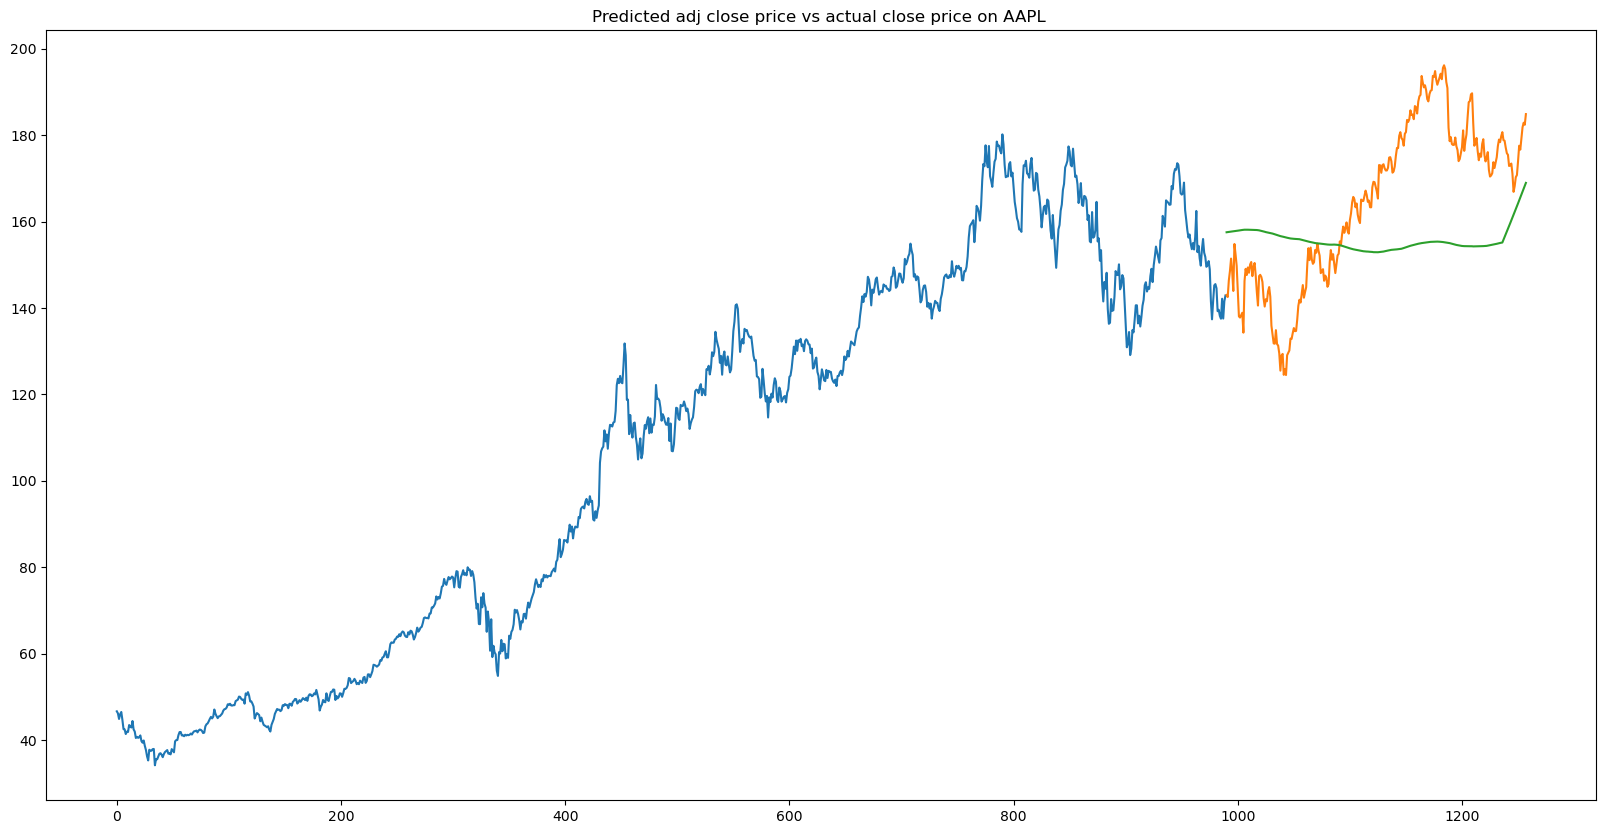

In [8]:
AAPL.index=AAPL['Date']

AAPL_df = AAPL.sort_index(ascending=True, axis=0)
AAPL_new = pd.DataFrame(index=range(0, len(AAPL)), columns=['Date', 'Adj Close'])

for i in range(0,len(AAPL_df)):
    AAPL_new['Date'][i] = AAPL_df['Date'][i]
    AAPL_new['Adj Close'][i] = AAPL_df['Adj Close'][i]

#splitting training and validation dataset
train = AAPL_new[:990]
valid = AAPL_new[990:]

#shapes of training set
print(train.shape)

#shapes of valid set
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-246+i:].sum() + sum(preds)
    b = a/246
    preds.append(b)
    
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

#plot
valid=valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.title('Predicted adj close price vs actual close price on AAPL ');

### On TSLA

(990, 2)
(268, 2)

RMSE value on validation set:
86.73244952226095


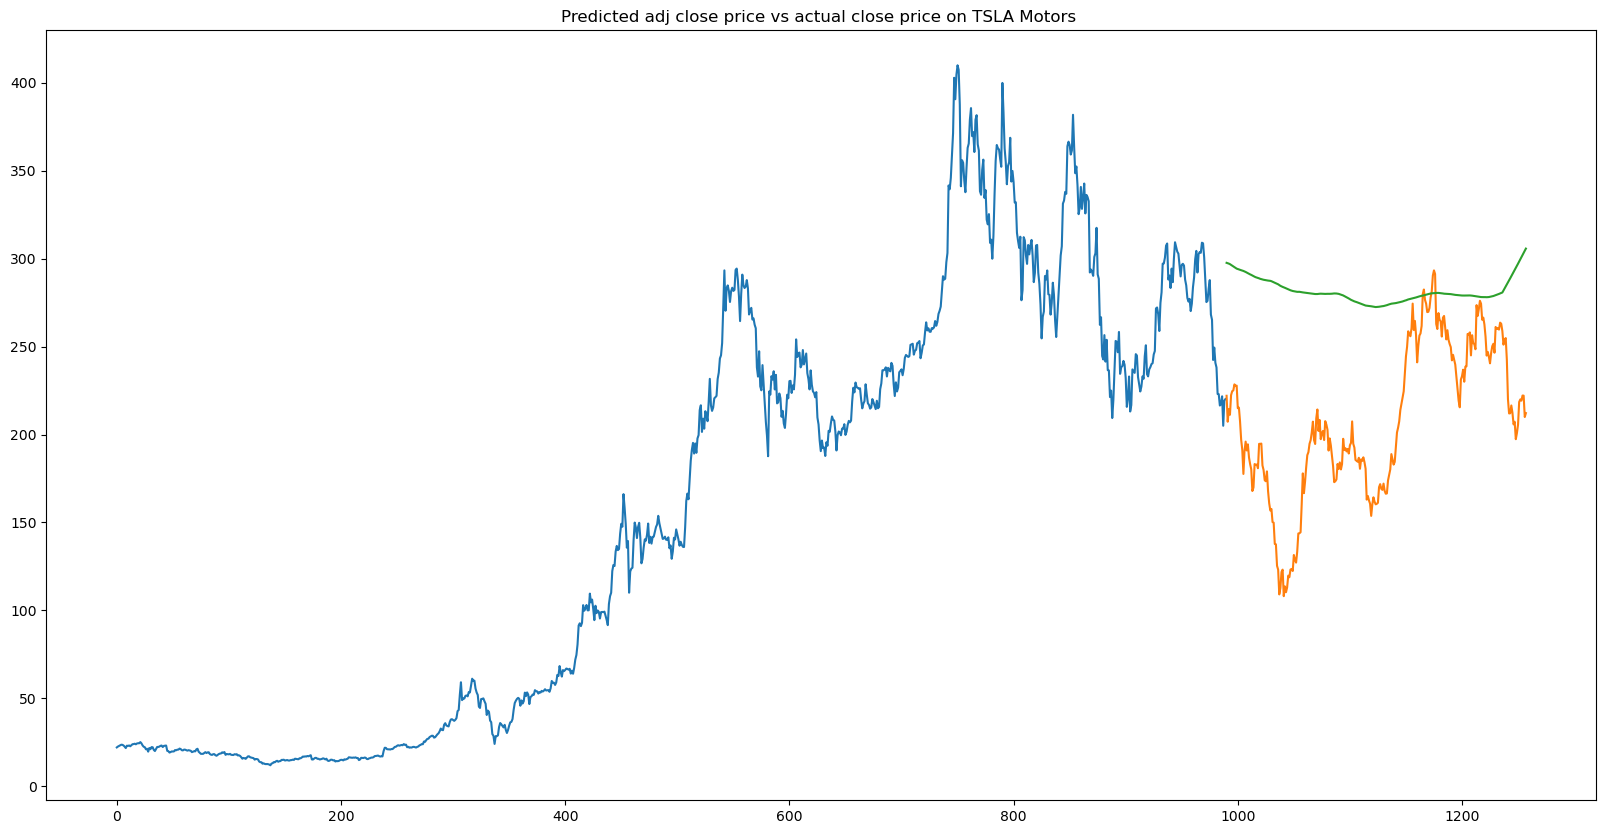

In [9]:
TSLA.index=tcs['Date']

TSLA_df = TSLA.sort_index(ascending=True, axis=0)
TSLA_new = pd.DataFrame(index=range(0, len(TSLA)), columns=['Date', 'Adj Close'])

for i in range(0,len(TSLA_df)):
    TSLA_new['Date'][i] = TSLA_df['Date'][i]
    TSLA_new['Adj Close'][i] = TSLA_df['Adj Close'][i]

#splitting training and validation dataset
train = TSLA_new[:990]
valid = TSLA_new[990:]

#shapes of training set
print(train.shape)

#shapes of valid set
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-246+i:].sum() + sum(preds)
    b = a/246
    preds.append(b)
    
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.title('Predicted adj close price vs actual close price on TSLA Motors ');

### On AMD

(990, 2)
(268, 2)

RMSE value on validation set:
21.796379637469023


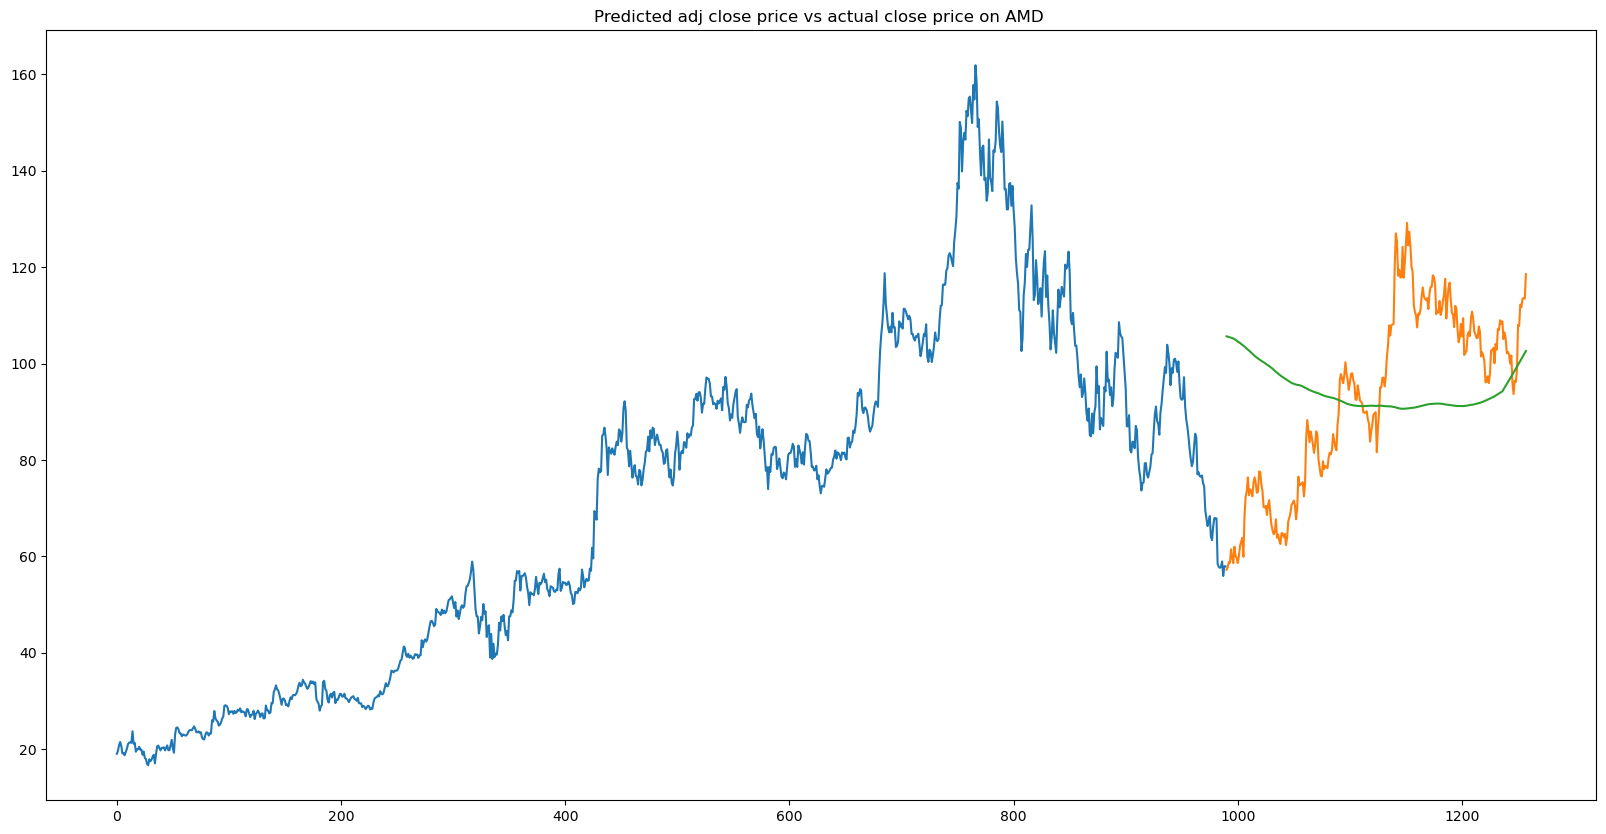

In [10]:
AMD.index=AMD['Date']

AMD_df = AMD.sort_index(ascending=True, axis=0)
AMD_new = pd.DataFrame(index=range(0, len(AMD)), columns=['Date', 'Adj Close'])

for i in range(0,len(AMD_df)):
    AMD_new['Date'][i] = AMD_df['Date'][i]
    AMD_new['Adj Close'][i] = AMD_df['Adj Close'][i]

#splitting training and validation dataset
train = AMD_new[:990]
valid = AMD_new[990:]

#shapes of training set
print(train.shape)

#shapes of valid set
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-246+i:].sum() + sum(preds)
    b = a/246
    preds.append(b)
    
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.title('Predicted adj close price vs actual close price on AMD ');

#### Inference

The RMSE value is minimum but the results are not very promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).

### k-Nearest Neighbors

Another interesting ML algorithm that one can use here is kNN (k nearest neighbours). Based on the independent variables, kNN finds the similarity between new data points and old data points. 

### On AAPL

In [13]:
#create features

AAPL_new['Date'] = AAPL_new['Date'].astype('datetime64[ns]')
AAPL_new["Year"] = AAPL_new.Date.dt.year
AAPL_new["Month"] = AAPL_new.Date.dt.month
AAPL_new["Day"] = AAPL_new.Date.dt.day
AAPL_new["DayOfWeek"] = AAPL_new.Date.dt.dayofweek
AAPL_new["DayOfYear"] = AAPL_new.Date.dt.dayofyear

AAPL_new.drop('Date', axis=1,inplace=True)

Model Fitted!
RMSE is 31.163739077973176


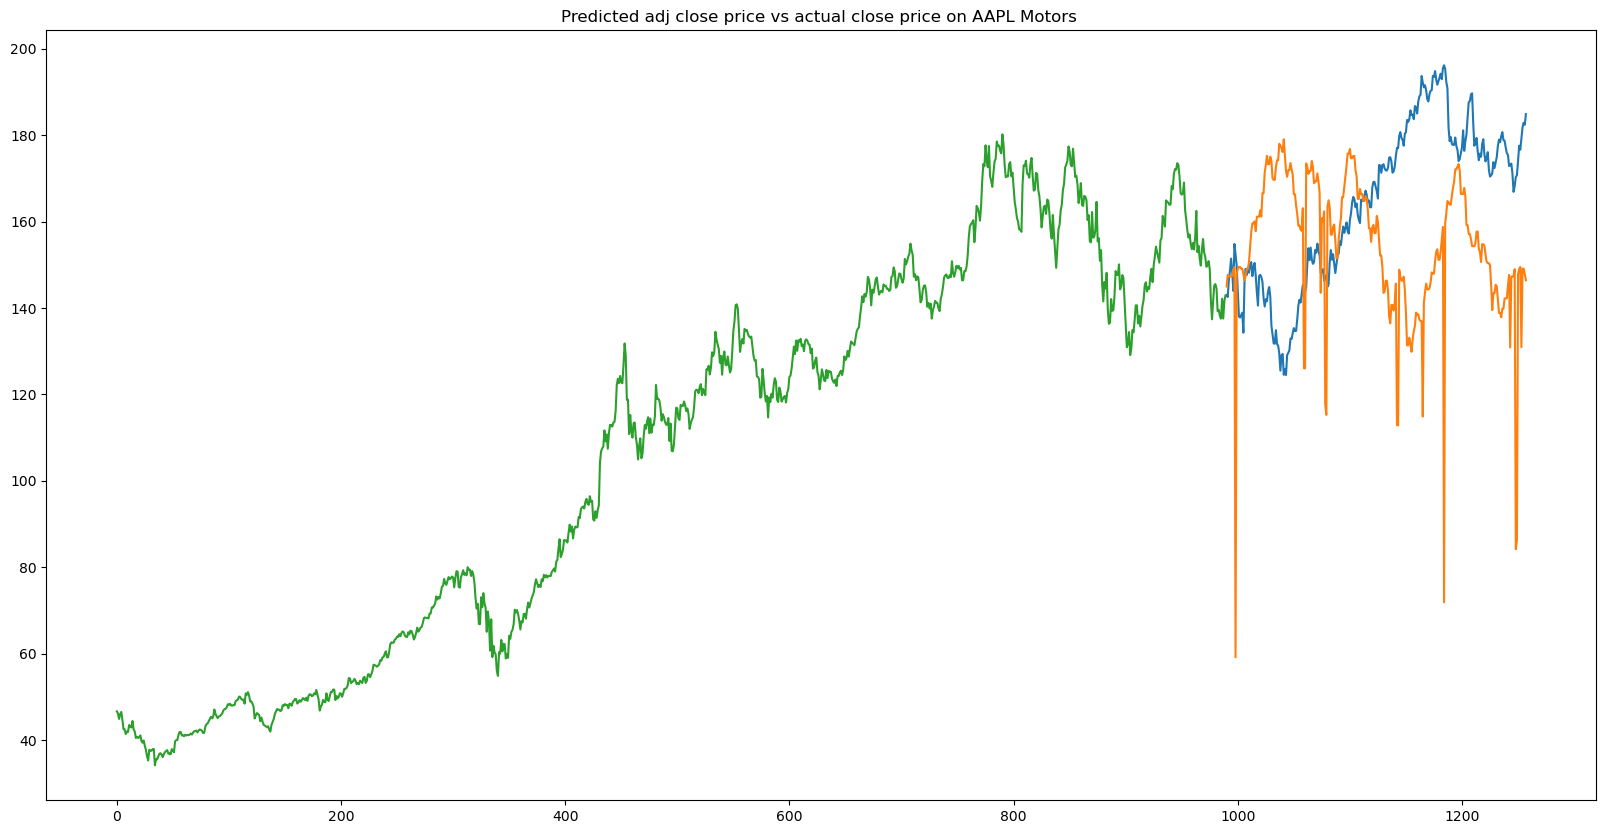

In [14]:
#split into train and validation
train = AAPL_new[:990]
valid = AAPL_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print('Model Fitted!')

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close']);
plt.title('Predicted adj close price vs actual close price on AAPL Motors ');


### On TSLA

In [11]:
#create features

TSLA_new['Date'] = TSLA_new['Date'].astype('datetime64[ns]')
TSLA_new["Year"] = TSLA_new.Date.dt.year
TSLA_new["Month"] = TSLA_new.Date.dt.month
TSLA_new["Day"] = TSLA_new.Date.dt.day
TSLA_new["DayOfWeek"] = TSLA_new.Date.dt.dayofweek
TSLA_new["DayOfYear"] = TSLA_new.Date.dt.dayofyear

TSLA_new.drop('Date', axis=1,inplace=True)

Model Fitted!
RMSE is 122.42385039256752


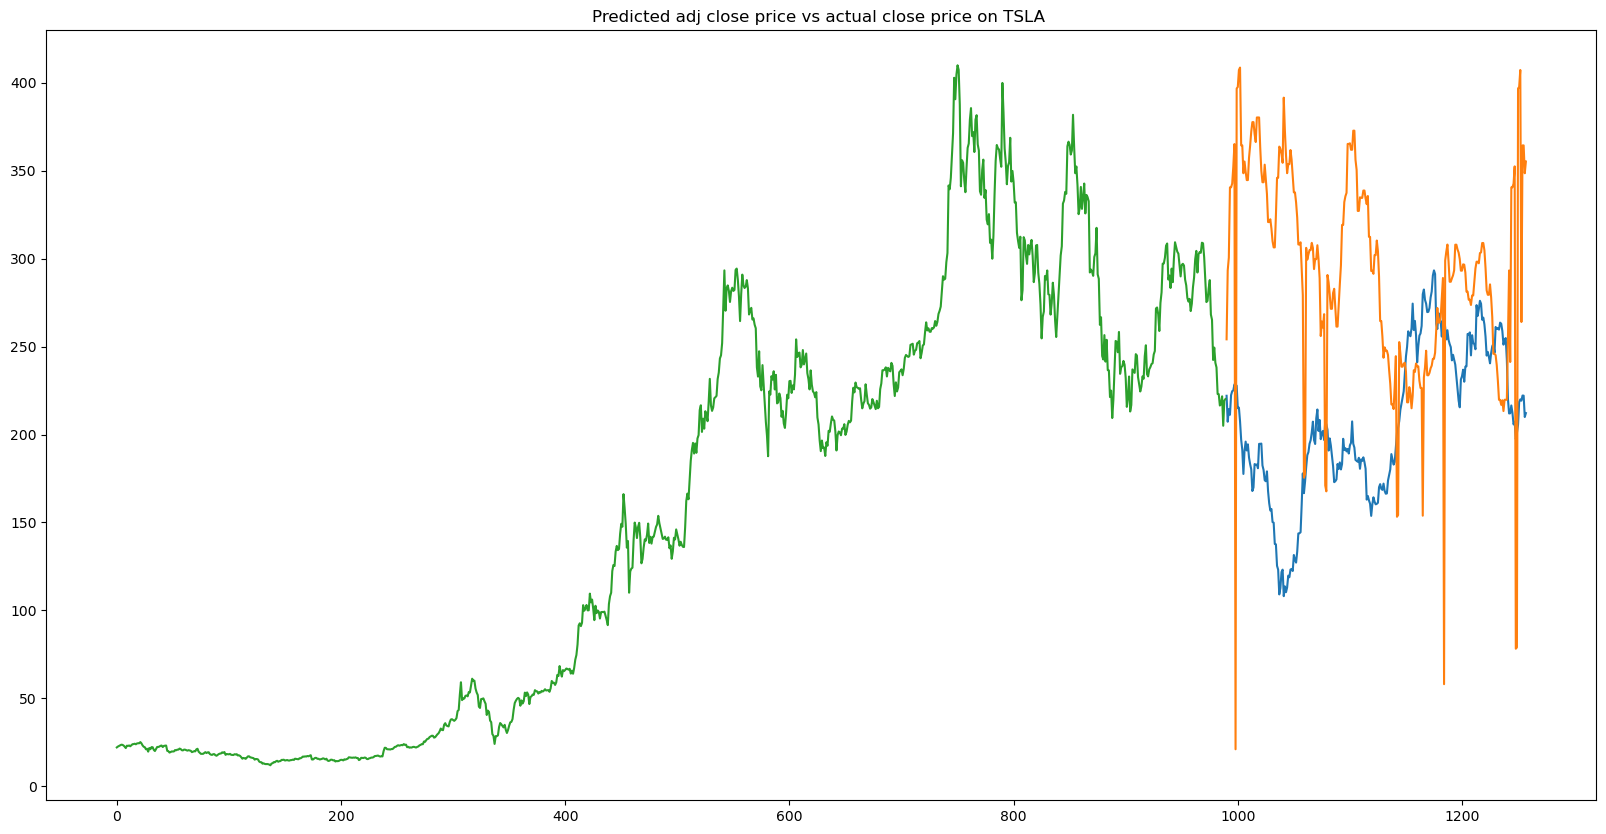

In [12]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

#split into train and validation
train = TSLA_new[:990]
valid = TSLA_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print('Model Fitted!')

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close']);
plt.title('Predicted adj close price vs actual close price on TSLA ');


### On AMD

In [15]:
#create features

AMD_new['Date'] = AMD_new['Date'].astype('datetime64[ns]')
AMD_new["Year"] = AMD_new.Date.dt.year
AMD_new["Month"] = AMD_new.Date.dt.month
AMD_new["Day"] = AMD_new.Date.dt.day
AMD_new["DayOfWeek"] = AMD_new.Date.dt.dayofweek
AMD_new["DayOfYear"] = AMD_new.Date.dt.dayofyear

AMD_new.drop('Date', axis=1,inplace=True)

Model Fitted!
RMSE is 42.55366556408922


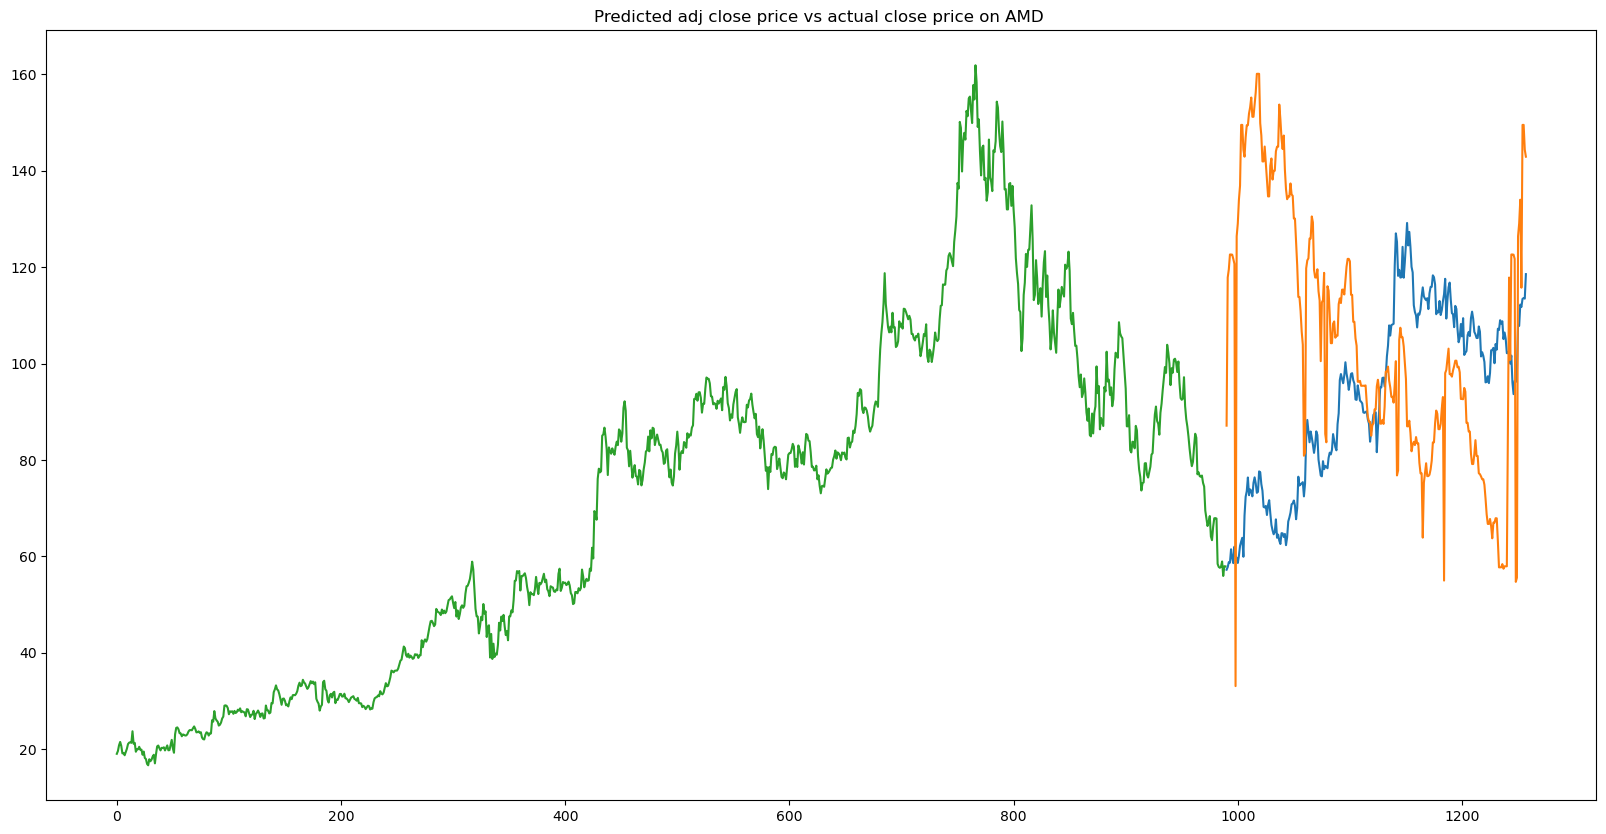

In [16]:
#split into train and validation
train = AMD_new[:990]
valid = AMD_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print('Model Fitted!')

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close']);
plt.title('Predicted adj close price vs actual close price on AMD ');

### Linear Regression

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.



#### On AAPL

Model Fitted!
RMSE is 37.48407779612184


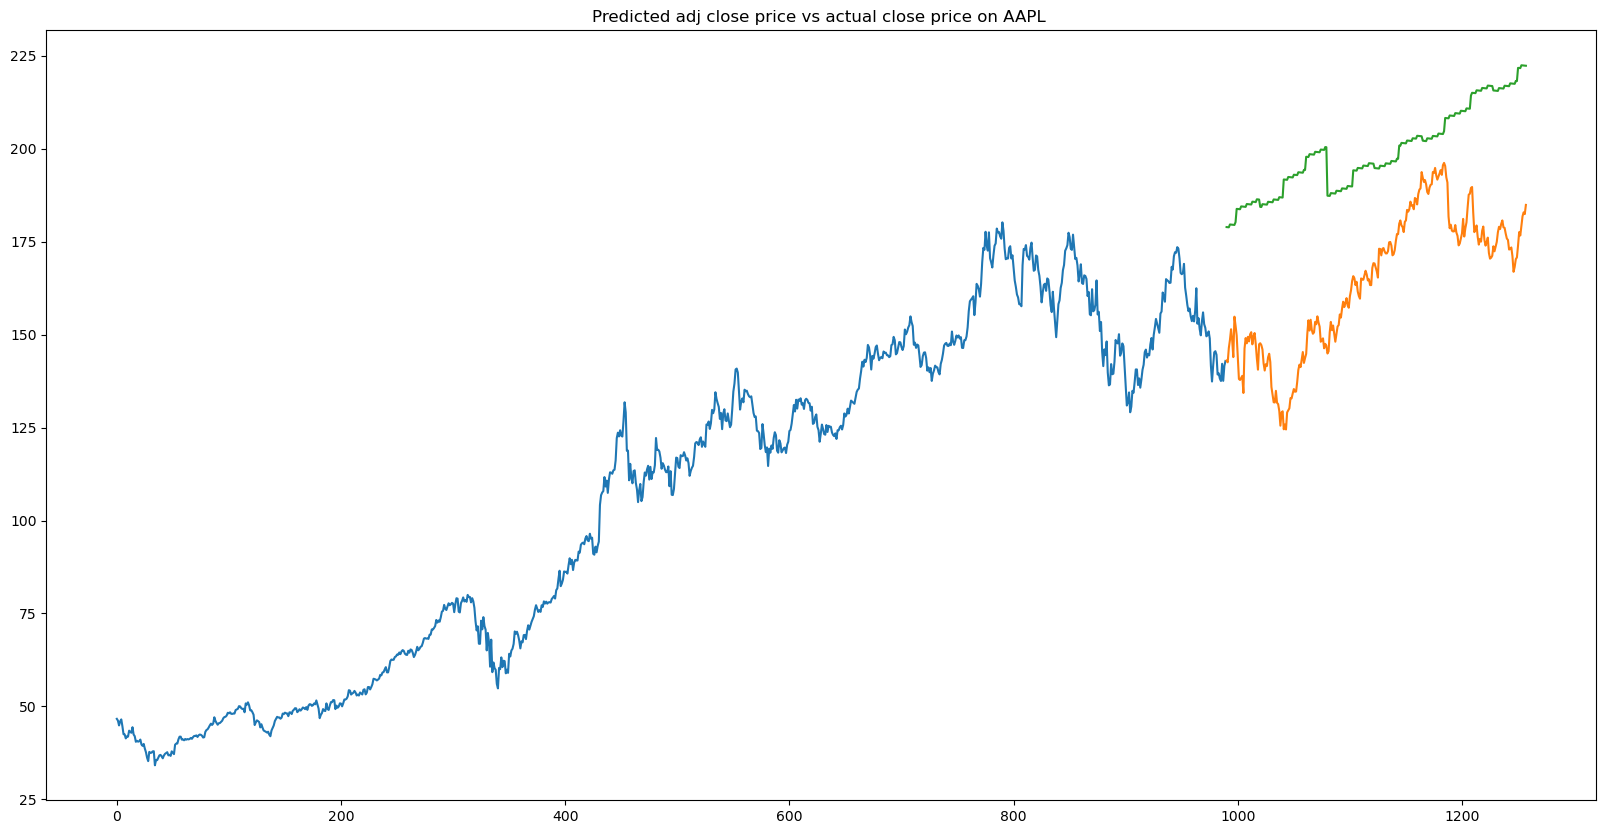

In [17]:
#split into train and validation
train = AAPL_new[:990]
valid = AAPL_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model Fitted!')

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = AAPL_new[990:].index
train.index = AAPL_new[:990].index

plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']]);
plt.title('Predicted adj close price vs actual close price on AAPL ');

#### On TSLA

Model Fitted!
RMSE is 190.2963685633874


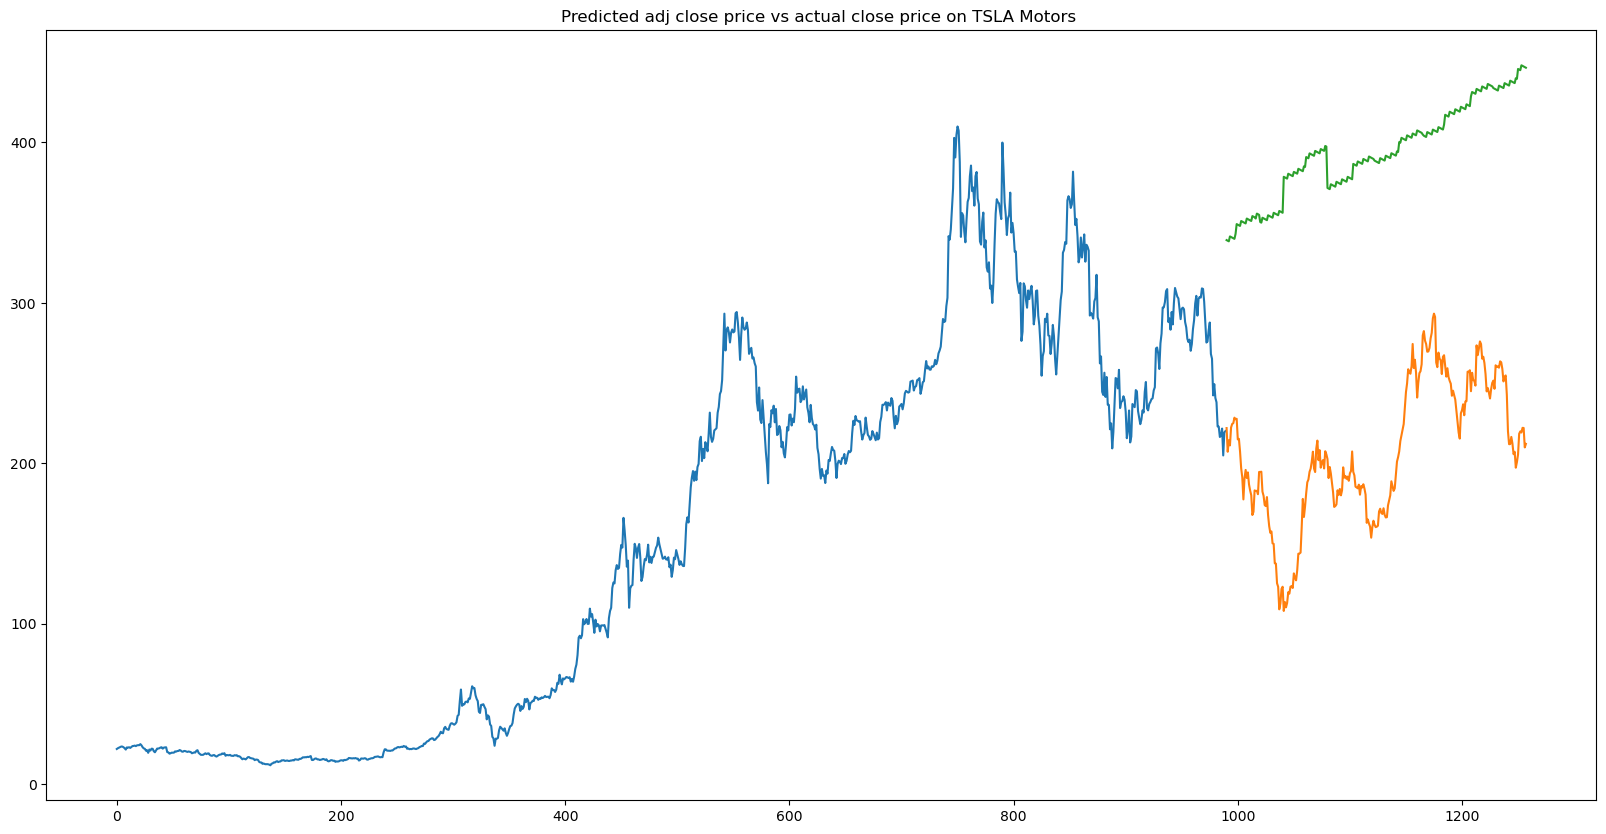

In [18]:
#split into train and validation
train = TSLA_new[:990]
valid = TSLA_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model Fitted!')

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = TSLA_new[990:].index
train.index = TSLA_new[:990].index

plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']]);
plt.title('Predicted adj close price vs actual close price on TSLA Motors ');

#### On AMD

Model Fitted!
RMSE is 44.97678244661676


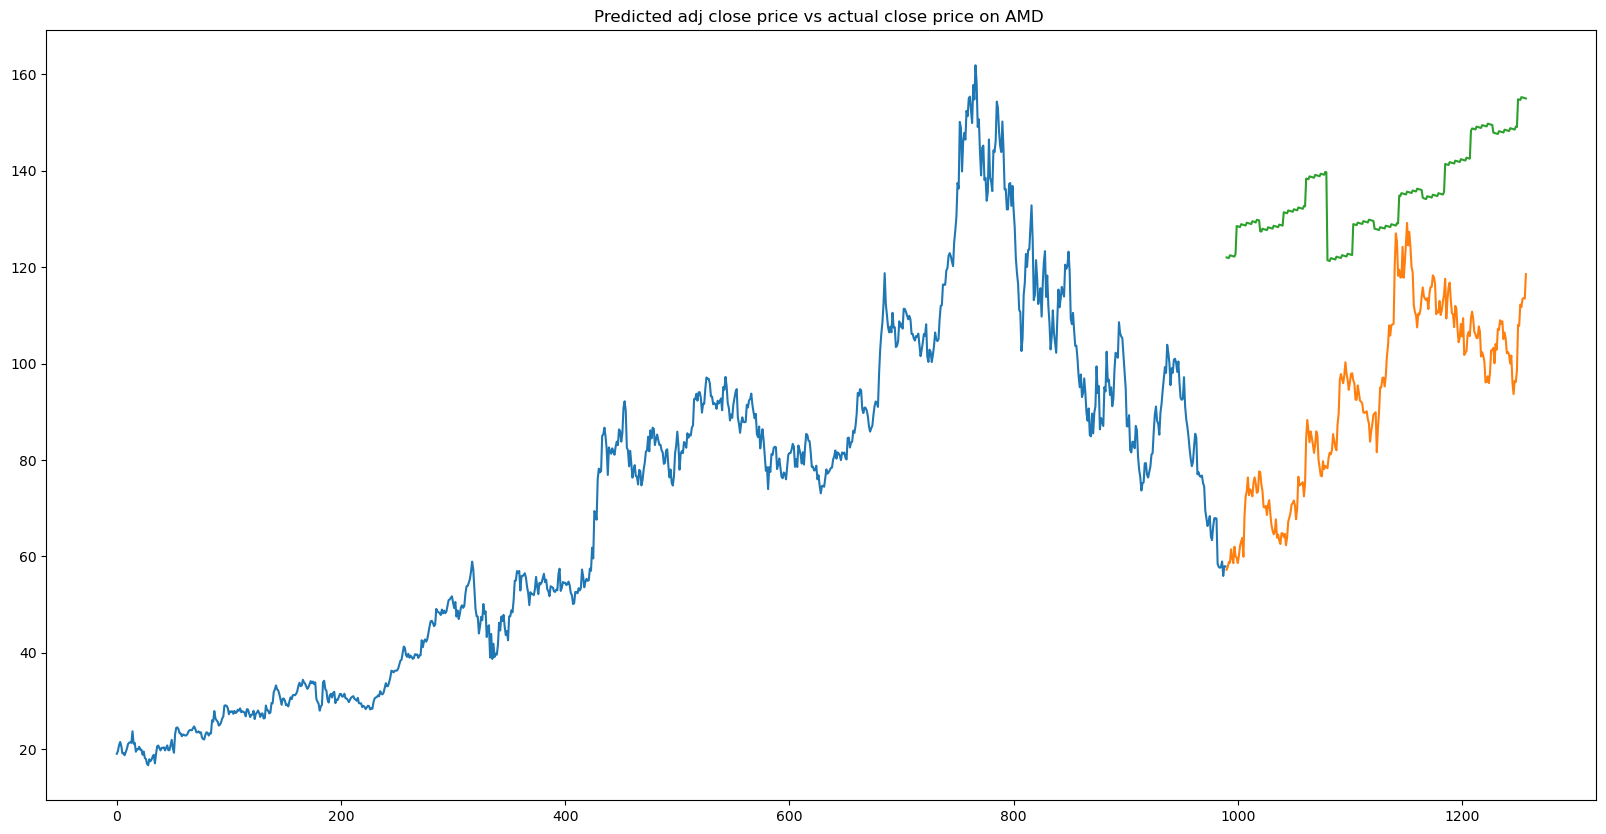

In [20]:
#split into train and validation
train = AMD_new[:990]
valid = AMD_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model Fitted!')

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = AMD_new[990:].index
train.index = AMD_new[:990].index

plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']]);
plt.title('Predicted adj close price vs actual close price on AMD ');

### LSTM

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

 - The input gate: The input gate adds information to the cell state

 - The forget gate: It removes the information that is no longer required by the model

 - The output gate: Output Gate at LSTM selects the information to be shown as output


#### On AAPL

930/930 - 30s - loss: 0.0037 - 30s/epoch - 32ms/step
Fitting Model
9/9 [==============================] - 1s 19ms/step
RMSE is 5.56051497606045


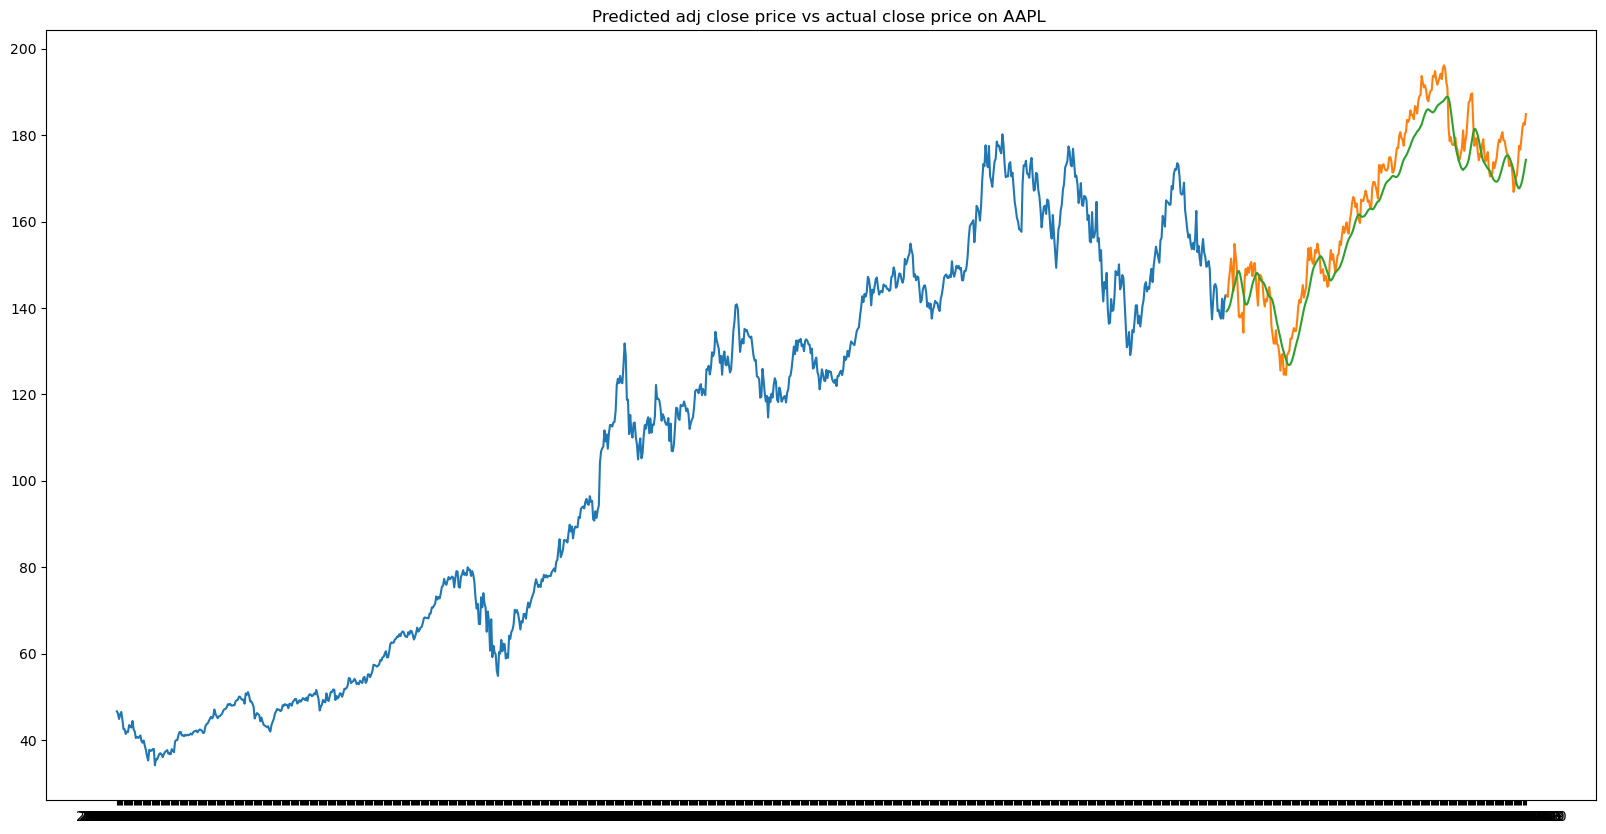

In [21]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
#creating dataframe
AAPL_lstm = pd.DataFrame(index=range(0,len(AAPL_df)),columns=['Date', 'Adj Close'])
for i in range(0,len(AAPL_df)):
    AAPL_lstm['Date'][i] = AAPL_df['Date'][i]
    AAPL_lstm['Adj Close'][i] = AAPL_df['Adj Close'][i]

#setting index
AAPL_lstm.index = AAPL_lstm.Date
AAPL_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = AAPL_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = AAPL_lstm[len(AAPL_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

#for plotting
train = AAPL_lstm[:990]
valid = AAPL_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']]);
plt.title('Predicted adj close price vs actual close price on AAPL ');


#### On TSLA

930/930 - 30s - loss: 0.0034 - 30s/epoch - 32ms/step
Fitting Model
9/9 [==============================] - 1s 21ms/step
RMSE is 15.194920994471628


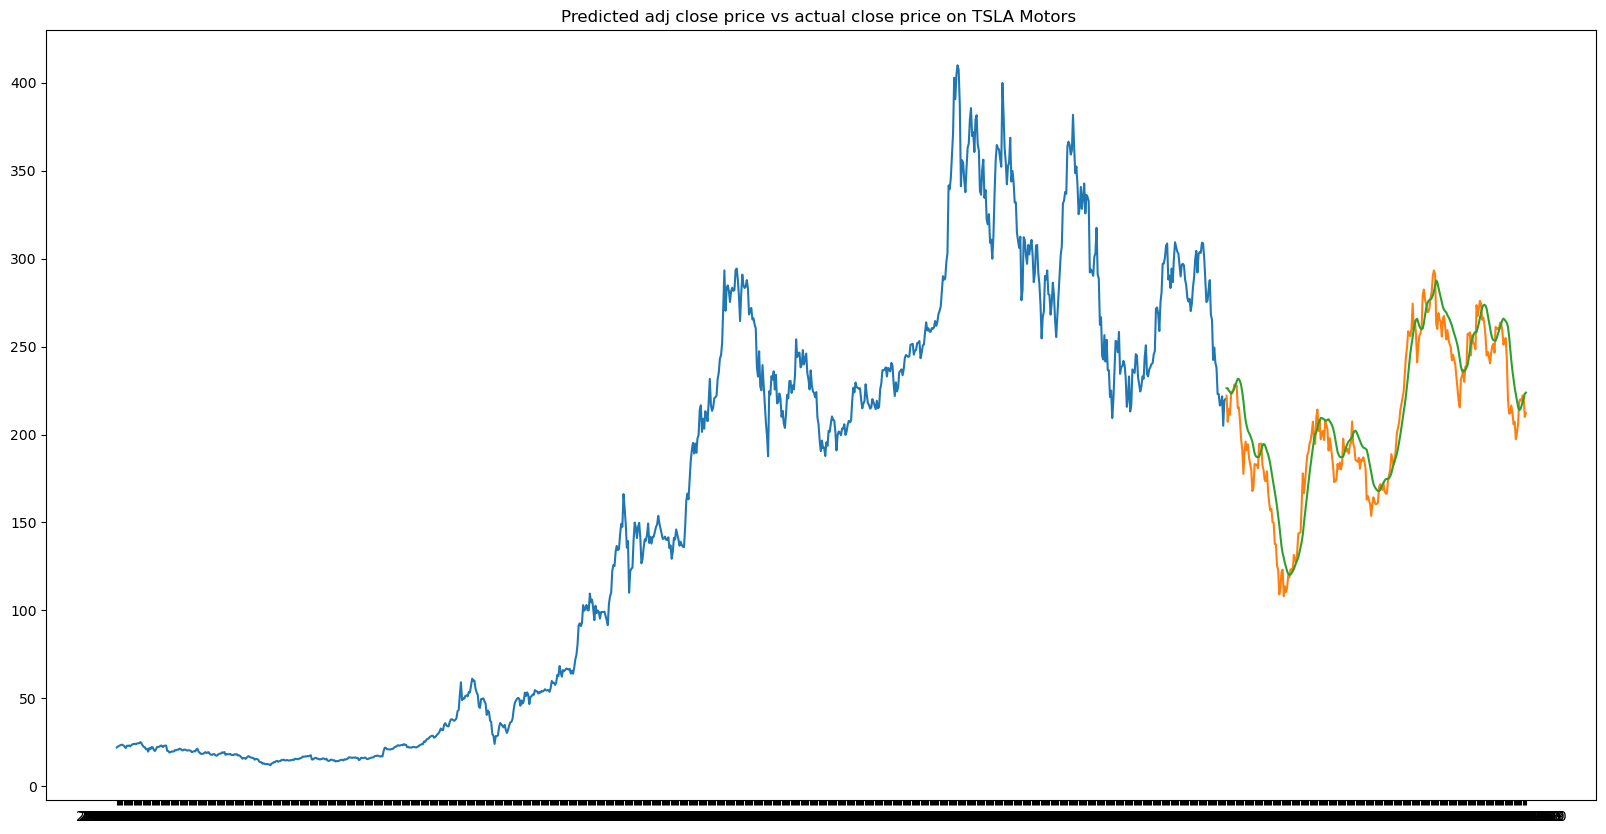

In [22]:
#creating dataframe
TSLA_lstm = pd.DataFrame(index=range(0,len(TSLA_df)),columns=['Date', 'Adj Close'])
for i in range(0,len(TSLA_df)):
    TSLA_lstm['Date'][i] = TSLA_df['Date'][i]
    TSLA_lstm['Adj Close'][i] = TSLA_df['Adj Close'][i]

#setting index
TSLA_lstm.index = TSLA_lstm.Date
TSLA_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = TSLA_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = TSLA_lstm[len(TSLA_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

#for plotting
train = TSLA_lstm[:990]
valid = TSLA_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']]);
plt.title('Predicted adj close price vs actual close price on TSLA Motors ');

#### On AMD

930/930 - 32s - loss: 0.0031 - 32s/epoch - 34ms/step
Fitting Model
9/9 [==============================] - 2s 25ms/step
RMSE is 4.5686417200775535


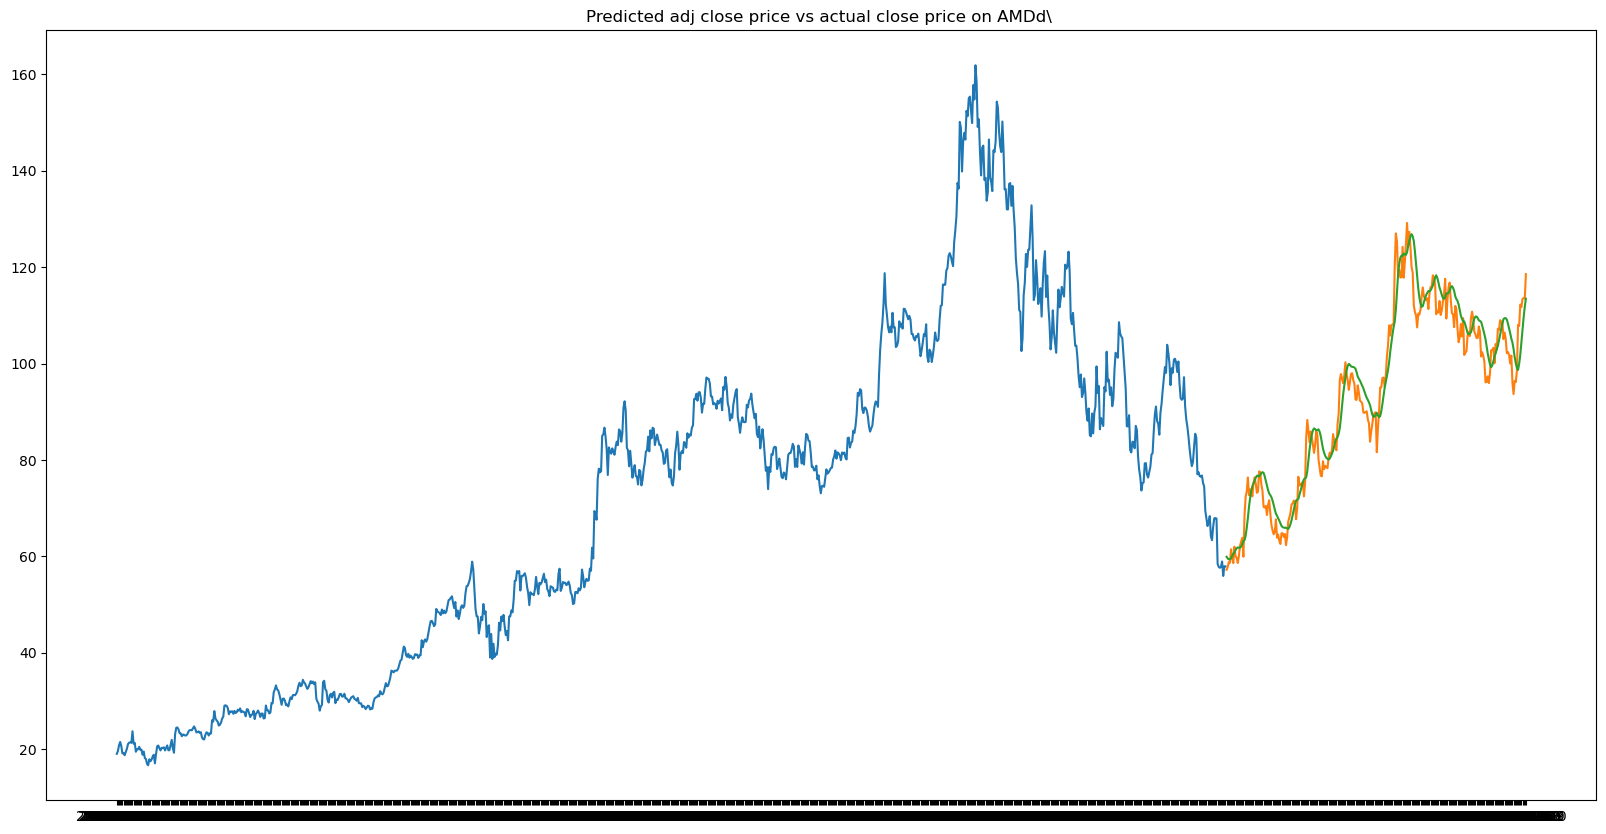

In [24]:
#creating dataframe
AMD_lstm = pd.DataFrame(index=range(0,len(AMD_df)),columns=['Date', 'Adj Close'])
for i in range(0,len(AMD_df)):
    AMD_lstm['Date'][i] = AMD_df['Date'][i]
    AMD_lstm['Adj Close'][i] = AMD_df['Adj Close'][i]

#setting index
AMD_lstm.index = AMD_lstm.Date
AMD_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = AMD_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = AMD_lstm[len(AMD_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

#for plotting
train = AMD_lstm[:990]
valid = AMD_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']]);
plt.title('Predicted adj close price vs actual close price on AMDd\ ');

#### Inference

Wow! The LSTM model can be tuned for various parameters such as changing the number of LSTM layers, adding dropout value or increasing the number of epochs. But are the predictions from LSTM enough to identify whether the stock price will increase or decrease.



 Stock price is affected by the news about the company and other factors like demonetization or merger/demerger of the companies. There are certain intangible factors as well which can often be impossible to predict beforehand